In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split
import warnings
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

warnings.simplefilter('ignore')
%matplotlib inline

In [3]:
# define a function to plot decision boundary
# Reference
# https://stackoverflow.com/questions/45075638/graph-k-nn-decision-boundaries-in-matplotlib

def plot_decision_boundary(model, title):
    h = 0.01
    cmap_light = ListedColormap(['#FFAAAA',  '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000',  '#0000FF'])

    x_min, x_max = x_train_part2[0].min(), x_train_part2[0].max() 
    y_min, y_max = x_train_part2[1].min(), x_train_part2[1].max()

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Also plot the training points
    plt.scatter(x_train_part2[0], x_train_part2[1], c=y_train_part2, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)

# Divorce Data

In [4]:
# split the data 
data = pd.read_csv('q3.csv', header = None)
data.head()
X = data[range(54)]
y = data[54]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)
X_part2 = data[range(2)]
y_part2 = data[54]
x_train_part2, x_test_part2, y_train_part2, y_test_part2 = train_test_split(X_part2, y_part2, test_size=0.2, 
                                                    random_state=42)

## Naive Bayes

### Part 1

not too much parameters to tune

In [5]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB().fit(x_train, y_train)
y_pre = NB.predict(x_test)
acc = accuracy_score(y_test, y_pre)
print('test accuracy of NB: ', acc)

test accuracy of NB:  0.9705882352941176


### Part 2
use the first 2 features to train model

In [6]:
NB = GaussianNB().fit(x_train_part2, y_train_part2)
y_pre = NB.predict(x_test_part2)
acc = accuracy_score(y_test_part2, y_pre)
print('test accuracy of NB: ', acc)

test accuracy of NB:  0.9117647058823529


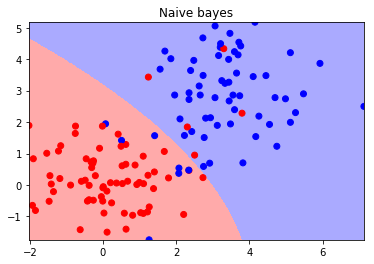

In [7]:
plot_decision_boundary(NB, 'Naive bayes')

## Logistic Regression

### Part 1
Use grid search to tune parameters.

In [8]:
reg = LogisticRegression()
parameters = {'penalty':['l1', 'l2'] , 'C' : np.linspace(1,20,50)}
tune_GSCV = GridSearchCV(reg, parameters, cv=5).fit(x_train, y_train)
print('Best parameters are: ', tune_GSCV.best_params_)
print('Best score are: ', tune_GSCV.best_score_)

Best parameters are:  {'C': 16.51020408163265, 'penalty': 'l1'}
Best score are:  0.9632352941176471


In [9]:
reg = LogisticRegression(C = 1, penalty='l1').fit(x_train, y_train)
y_pre = reg.predict(x_test)
acc = accuracy_score(y_test, y_pre)
print('test accuracy of Logistic regression: ', acc)

test accuracy of Logistic regression:  0.9705882352941176


### Part 2

In [10]:
reg_2 = LogisticRegression()
parameters = {'penalty':['l1', 'l2'] , 'C' : np.linspace(1,20,50)}
tune_GSCV = GridSearchCV(reg_2, parameters, cv=5).fit(x_train_part2, y_train_part2)
print('Best parameters are: ', tune_GSCV.best_params_)
print('Best score are: ', tune_GSCV.best_score_)

Best parameters are:  {'C': 1.0, 'penalty': 'l1'}
Best score are:  0.9044117647058824


In [11]:
reg_2 = LogisticRegression(C=1, penalty='l1').fit(x_train_part2, y_train_part2)
y_pre = reg_2.predict(x_test_part2)
acc = accuracy_score(y_test_part2, y_pre)
print('accuracy of Logistic Regression: ', acc)

accuracy of Logistic Regression:  0.9117647058823529


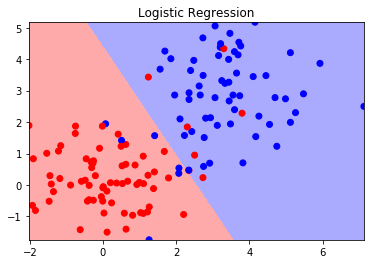

In [12]:
plot_decision_boundary(reg_2, 'Logistic Regression')

# KNN

### Part 1

In [13]:
knn = KNeighborsClassifier()
parameters = {'p':[1,2] , 'n_neighbors' : range(5, 50)}
tune_GSCV = GridSearchCV(knn, parameters, cv=5).fit(x_train, y_train)
print('Best parameters are: ', tune_GSCV.best_params_)
print('Best score are: ', tune_GSCV.best_score_)

Best parameters are:  {'n_neighbors': 5, 'p': 1}
Best score are:  0.9779411764705882


In [15]:
knn = KNeighborsClassifier( n_neighbors=5, p = 1).fit(x_train, y_train)
y_pre = knn.predict(x_test)
acc = accuracy_score(y_test, y_pre)
print('test accuracy of KNN : ', acc)

test accuracy of KNN :  0.9705882352941176


### Part 2

In [16]:
knn_2 = KNeighborsClassifier()
parameters = {'p':[1,2] , 'n_neighbors' : range(5, 50)}
tune_GSCV = GridSearchCV(knn_2, parameters, cv=5).fit(x_train_part2, y_train_part2)
print('Best parameters are: ', tune_GSCV.best_params_)
print('Best score are: ', tune_GSCV.best_score_)

Best parameters are:  {'n_neighbors': 12, 'p': 2}
Best score are:  0.9117647058823529


In [17]:
knn_2 = KNeighborsClassifier(n_neighbors=12, p = 2).fit(x_train_part2, y_train_part2)
y_pre = knn_2.predict(x_test_part2)
acc = accuracy_score(y_test_part2, y_pre)
print('test accuracy of KNN with only 2 features: ', acc)

test accuracy of KNN with only 2 features:  0.9117647058823529


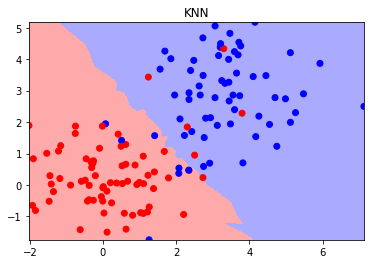

In [18]:
plot_decision_boundary(knn_2, 'KNN')

# MNIST DATA

In [17]:
data = np.genfromtxt('data.dat').T
label = np.genfromtxt('label.dat')
# 1990 picture
# each column is a pic
# each row is a feature

In [18]:
x_train_mnist, x_test_mnist, y_train_mnist, y_test_mnist = train_test_split(data, label, test_size=0.2, 
                                                    random_state=42)

## Naive bayes


In [19]:
NB_mnist = GaussianNB().fit(x_train_mnist, y_train_mnist)
y_pre = NB_mnist.predict(x_test_mnist)
acc = accuracy_score(y_test_mnist, y_pre)
print('accuracy of NB: ', acc)

accuracy of NB:  0.8065326633165829


## Logistic regression

In [20]:
reg_mnist = LogisticRegression()
parameters = {'penalty':['l1', 'l2'] , 'C' : np.linspace(1,20,20)}
tune_GSCV = GridSearchCV(reg_mnist, parameters, cv=5).fit(x_train_mnist, y_train_mnist)
print('Best parameters are: ', tune_GSCV.best_params_)
print('Best score are: ', tune_GSCV.best_score_)

Best parameters are:  {'C': 1.0, 'penalty': 'l2'}
Best score are:  0.9780150753768844


In [21]:
reg_mnist = LogisticRegression(C = 1, penalty='l2').fit(x_train_mnist, y_train_mnist)
y_pre = reg_mnist.predict(x_test_mnist)
acc = accuracy_score(y_test_mnist, y_pre)
print('accuracy of Logistic regression: ', acc)

accuracy of Logistic regression:  0.9824120603015075


# KNN

In [53]:
knn_mnist = KNeighborsClassifier()
parameters = {'p':[1,2] , 'n_neighbors' : range(5,30)}
tune_GSCV = GridSearchCV(knn_mnist, parameters, cv=5).fit(x_train_mnist, y_train_mnist)
print('Best parameters are: ', tune_GSCV.best_params_)
print('Best score are: ', tune_GSCV.best_score_)

Best parameters are:  {'n_neighbors': 5, 'p': 2}
Best score are:  0.9930904522613065


In [55]:
knn = KNeighborsClassifier(n_neighbors=5, p=2).fit(x_train_mnist, y_train_mnist)
y_pre = reg.predict(x_test_mnist)
acc = accuracy_score(y_test_mnist, y_pre)
print('test accuracy of KNN: ', acc)

test accuracy of KNN:  0.9824120603015075
